<a href="https://colab.research.google.com/github/seongheechoi/AI_boot_camp/blob/master/kb_4_%E1%84%80%E1%85%A9%E1%84%80%E1%85%A2%E1%86%A8%E1%84%89%E1%85%A6%E1%84%87%E1%85%AE%E1%86%AB%E1%84%92%E1%85%AA_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 탐색
- 스케일링
- 원 핫 인코딩
- 클러스터링
- kMeans
- 고객세분화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%config InlineBackend.figure_format = 'retina'

# 데이터 읽기

In [ ]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0   7382      0 --:--:-- --:--:-- --:--:--  7382


In [ ]:
!head -10 customer.csv

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [ ]:
df = pd.read_csv('customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 원 핫 인코딩

In [ ]:
# 성별을 One Hot Encoding 
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

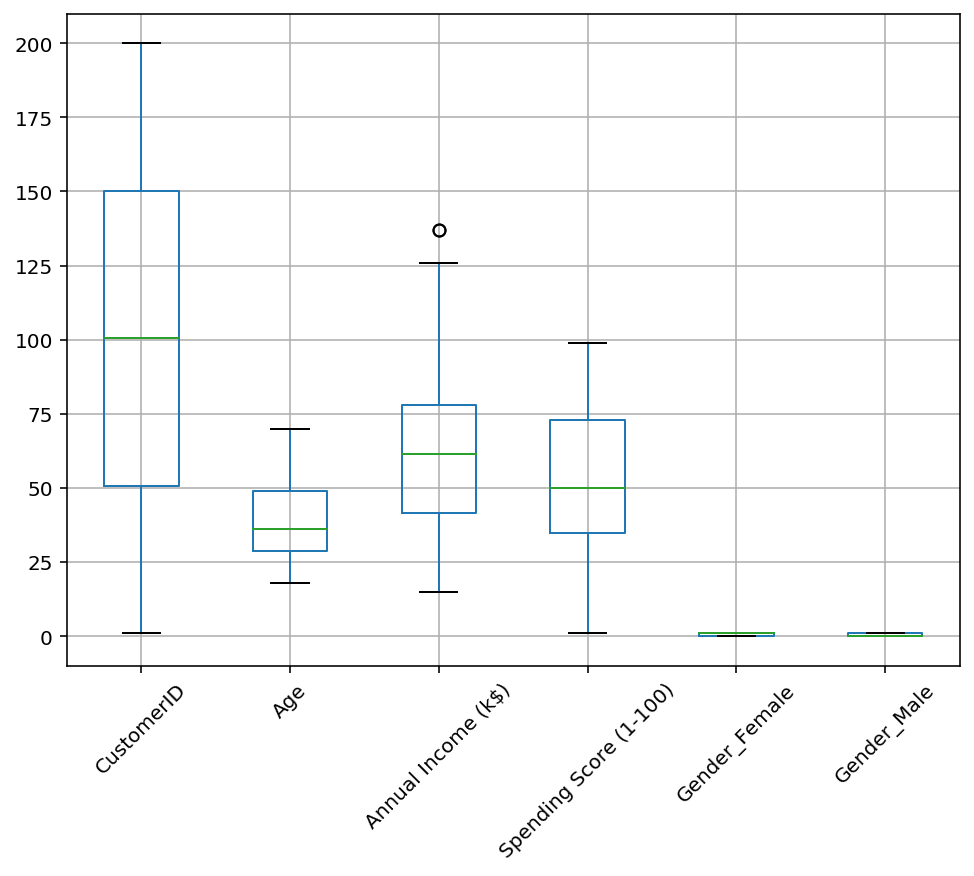

In [ ]:
df.boxplot(figsize=(8,6))
plt.xticks(rotation=45)

# 두 개의 컬럼(특성)만 사용 (연속 값)

Text(0, 0.5, 'Spending Score (1-100)')

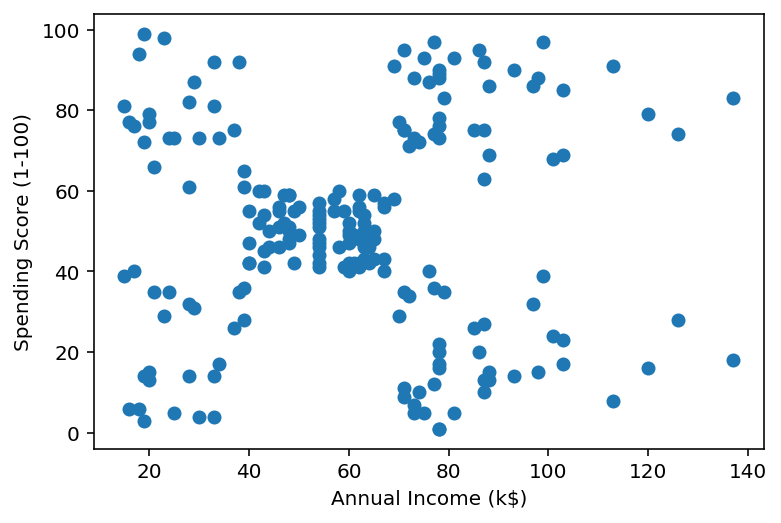

In [ ]:
# plt.scatter(X.values[:,0],X.values[:,1])
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous = ['Annual Income (k$)', 'Spending Score (1-100)']
df_scale = scaler.fit_transform(df[continuous])
df_scale[:5] # 데이터프레임이 ndarray로 자동으로 변환된다

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [ ]:
df[:5] # 원래의 데이터프레임은 그대로

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


## (참고) 최적의 클러스터 수 찾기

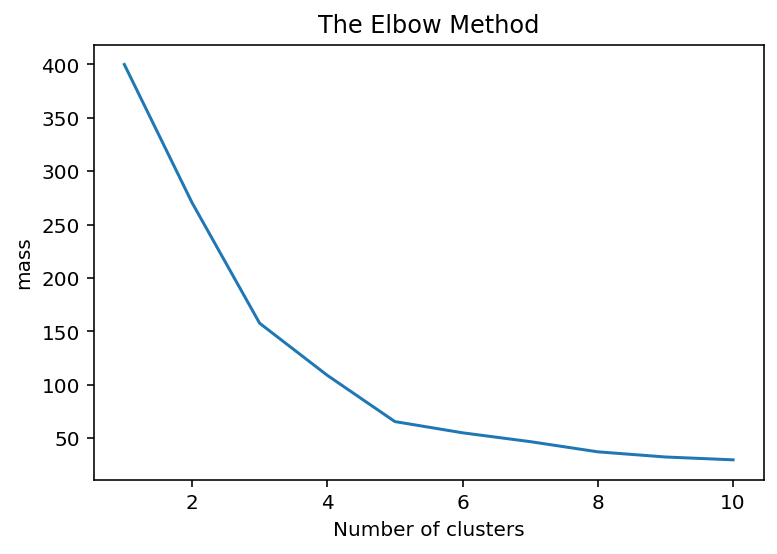

In [ ]:
mass = []
for i in range(1, 11):
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scale)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 11), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

results =[]
for c in range(2,15):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df_scale)
  silhouette_avg = silhouette_score(df_scale, cluster_labels)
  results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

In [ ]:
result

,n_clusters,silhouette_score
0,2,0.286406
1,3,0.466585
2,4,0.493907
3,5,0.554657
4,6,0.539880
5,7,0.531711
6,8,0.453916
7,9,0.458053
8,10,0.460939
9,11,0.451769


# 클러스터링
- 두 개의 특성만 사용
- k=5 선택

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_scale)
# print(kmeans.labels_)
y_kmeans = kmeans.predict(df_scale)
print(y_kmeans)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [ ]:
kmeans.predict([[0.9,-0.4],[-0.7,0.8]])

array([0, 2], dtype=int32)

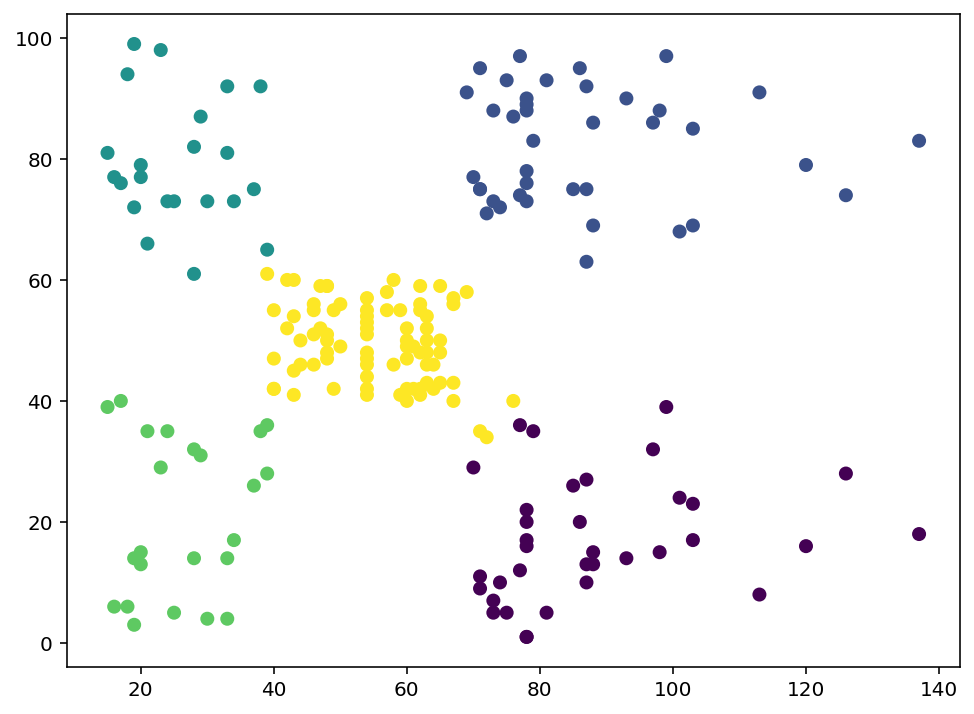

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans)

In [ ]:
df["cluster"] = y_kmeans
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,3
1,2,21,15,81,0,1,2
2,3,20,16,6,1,0,3
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,3


In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male', 'cluster'],
      dtype='object')

In [ ]:
df = df.drop(['CustomerID','cluster'], axis=1, errors='ignore')
df_new=df.copy()
df_new[continuous] = scaler.fit_transform(df_new[continuous])

In [ ]:
df_new[:3]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,-1.738999,-0.434801,0,1
1,21,-1.738999,1.195704,0,1
2,20,-1.700830,-1.715913,1,0


# 모든 특성 사용한 클러스터링

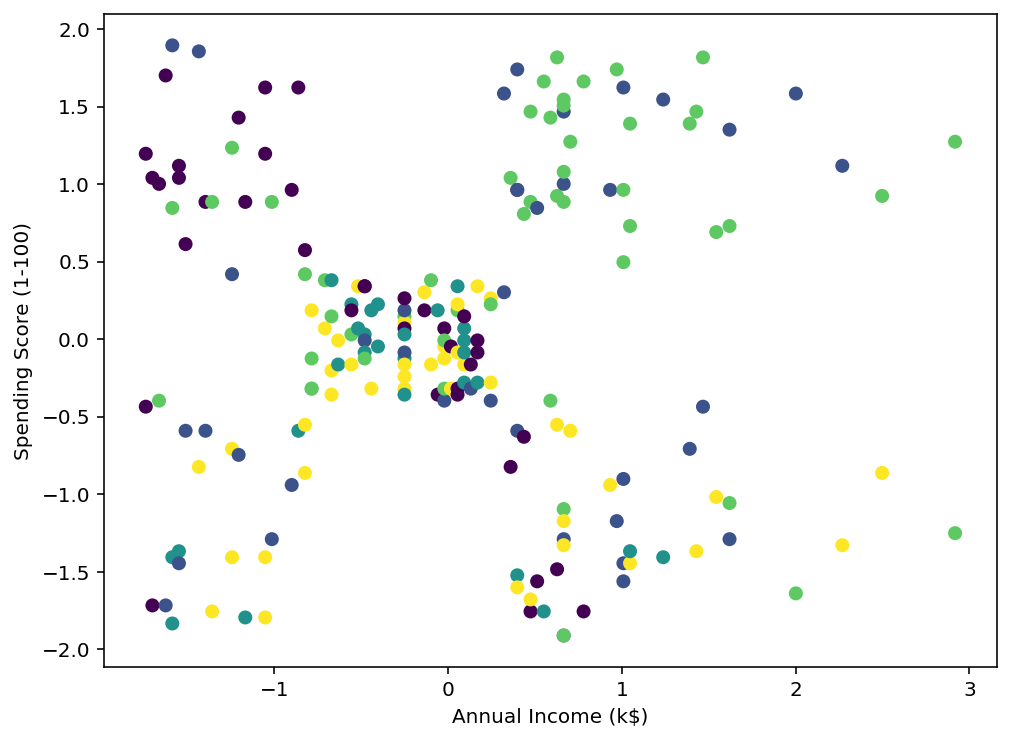

In [ ]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df_new)
plt.figure(figsize=(8, 6))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df_new['Annual Income (k$)'], df_new['Spending Score (1-100)'], 
                    c=y_kmeans)   

In [ ]:
df_new['cluster'] = y_kmeans
df_new[:20]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,-1.738999,-0.434801,0,1,0
1,21,-1.738999,1.195704,0,1,0
2,20,-1.700830,-1.715913,1,0,0
3,23,-1.700830,1.040418,1,0,0
4,31,-1.662660,-0.395980,1,0,3
5,22,-1.662660,1.001596,1,0,0
6,35,-1.624491,-1.715913,1,0,1
7,23,-1.624491,1.700384,1,0,0
8,64,-1.586321,-1.832378,0,1,2
9,30,-1.586321,0.846310,1,0,3


## 스케일링을 원래 스케일로 원상복귀
- inverse_transform 사용

In [ ]:
df_new[continuous] = scaler.inverse_transform(df_new[continuous])

In [ ]:
df_new

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,15.0,39.0,0,1,0
1,21,15.0,81.0,0,1,0
2,20,16.0,6.0,1,0,0
3,23,16.0,77.0,1,0,0
4,31,17.0,40.0,1,0,3
...,...,...,...,...,...,...
195,35,120.0,79.0,1,0,1
196,45,126.0,28.0,1,0,4
197,32,126.0,74.0,0,1,3
198,32,137.0,18.0,0,1,3
